# COMPILING DATA INTO ONE DATAFRAME

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
from dateutil.relativedelta import relativedelta
from google.colab import drive
drive.mount('/content/drive')
plt.style.use('ggplot')

file_path = '/content/drive/My Drive/Maroon Capital//Maroon Capstone/datatest.csv'

# Read the CSV
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Mounted at /content/drive


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'date', 'symbol', 'twitterPosts', 'twitterComments',
       'twitterLikes', 'twitterImpressions', 'twitterSentiment'],
      dtype='object')


In [ ]:
aapl_df = df[df['symbol'] == 'AAPL']
aapl_df.rename(columns={'date': 'Date'}, inplace=True)
aapl_df.head(-1)

<ipython-input-3-c6995fedb0da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df.rename(columns={'date': 'Date'}, inplace=True)


,Unnamed: 0,Date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
27,27,2021-11-19,AAPL,2379.0,22985.0,157720.0,13544431.0,NaN
75,75,2021-11-20,AAPL,638.0,6557.0,51217.0,4549378.0,NaN
113,113,2021-11-21,AAPL,463.0,11910.0,85673.0,2611858.0,NaN
153,153,2021-11-22,AAPL,2130.0,9471.0,53753.0,20781957.0,NaN
...,...,...,...,...,...,...,...,...
57835,57835,2023-12-31,AAPL,3133.0,115282.0,822727.0,20597736.0,0.534964
57920,57920,2024-01-01,AAPL,2947.0,109782.0,780961.0,21541547.0,0.514511
58005,58005,2024-01-02,AAPL,2925.0,119739.0,697722.0,24761700.0,0.567959
58090,58090,2024-01-03,AAPL,3109.0,132084.0,727167.0,23056417.0,0.517423


In [ ]:
# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Define the time frame
start_date = '2021-11-18'
end_date = '2023-01-04'

# Get the historical prices for this ticker
aaplstock_df = tickerData.history(period='1d', start=start_date, end=end_date)
aaplstock_df = aaplstock_df.reset_index()
aaplstock_df['Date'] = pd.to_datetime(aaplstock_df['Date']).dt.date
# Display the data
aaplstock_df.head(-1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-11-18,151.779912,156.677622,151.128196,155.887665,137827700,0.0,0.0
1,2021-11-19,155.670417,158.998111,154.564486,158.534012,117305600,0.0,0.0
2,2021-11-22,159.649840,163.619366,158.978385,158.998138,117467900,0.0,0.0
3,2021-11-23,159.096842,159.768311,157.062712,159.383209,96041900,0.0,0.0
4,2021-11-24,158.731510,160.104056,157.635448,159.906570,69463600,0.0,0.0
...,...,...,...,...,...,...,...,...
276,2022-12-23,130.026375,131.516136,128.755113,130.959961,63814900,0.0,0.0
277,2022-12-27,130.483217,130.513011,127.841370,129.142426,69007800,0.0,0.0
278,2022-12-28,128.784892,130.135609,125.010834,125.179672,85438400,0.0,0.0
279,2022-12-29,127.116366,129.589368,126.858146,128.725311,75703700,0.0,0.0


In [ ]:
aaplstock_df['Date'] = pd.to_datetime(aaplstock_df['Date']).dt.date
aapl_df['Date'] = pd.to_datetime(aapl_df['Date']).dt.date

# Merge the two DataFrames on the 'Date' column
apdf = pd.merge(aaplstock_df[['Date', 'Close']], aapl_df[['Date', 'twitterPosts','twitterComments','twitterLikes','twitterImpressions']], on='Date', how='inner')

# Rename the columns if desired
apdf.rename(columns={'Close': 'ClosingPrice'}, inplace=True)

# Now df_merged is your new DataFrame with only the desired columns
apdf.head(-5)

<ipython-input-5-4d24134f2511>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['Date'] = pd.to_datetime(aapl_df['Date']).dt.date


,Date,ClosingPrice,twitterPosts,twitterComments,twitterLikes,twitterImpressions
0,2021-11-18,155.887665,811.0,2592.0,21674.0,7981808.0
1,2021-11-19,158.534012,2379.0,22985.0,157720.0,13544431.0
2,2021-11-22,158.998138,2130.0,9471.0,53753.0,20781957.0
3,2021-11-23,159.383209,2144.0,29803.0,93381.0,24331054.0
4,2021-11-24,159.906570,1914.0,81149.0,110648.0,18186184.0
...,...,...,...,...,...,...
269,2022-12-19,131.466461,5729.0,46675.0,198364.0,41285501.0
270,2022-12-20,131.396957,6492.0,105844.0,446597.0,43436755.0
271,2022-12-21,134.525452,6580.0,49378.0,200851.0,33770077.0
272,2022-12-22,131.327423,6049.0,33573.0,194498.0,29526621.0


# **MODEL BUILDING**

BUILDING THE MODEL WITH YEARS 2021-2023, 80 20 train test split

In [ ]:
from sklearn.preprocessing import StandardScaler
for x in range(2,6):
   X = apdf.iloc[:, x].values
   sc_X = StandardScaler()
   #print(X)
   X = sc_X.fit_transform(X.reshape(-1,1))
   apdf.iloc[:, x]=X
apdf.head(n=5)

,Date,ClosingPrice,twitterPosts,twitterComments,twitterLikes,twitterImpressions
0,2021-11-18,155.887665,-1.113798,-0.267719,-0.244658,-0.810723
1,2021-11-19,158.534012,-0.499879,-0.211686,-0.189759,-0.602169
2,2021-11-22,158.998138,-0.597370,-0.248818,-0.231713,-0.330820
3,2021-11-23,159.383209,-0.591889,-0.192952,-0.215722,-0.197757
4,2021-11-24,159.906570,-0.681941,-0.051870,-0.208754,-0.428141


In [ ]:
TargetVariable=['ClosingPrice']
Predictors=['twitterPosts','twitterComments','twitterLikes','twitterImpressions']

X=apdf[Predictors].values
y=apdf[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
print(PredictorScalerFit.scale_)
print(TargetVarScalerFit.scale_)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[1. 1. 1. 1.]
[13.13773176]
(223, 4)
(223, 1)
(56, 4)
(56, 1)


In [ ]:
apdf

,Date,ClosingPrice,twitterPosts,twitterComments,twitterLikes,twitterImpressions
0,2021-11-18,155.887665,-1.113798,-0.267719,-0.244658,-0.810723
1,2021-11-19,158.534012,-0.499879,-0.211686,-0.189759,-0.602169
2,2021-11-22,158.998138,-0.597370,-0.248818,-0.231713,-0.330820
3,2021-11-23,159.383209,-0.591889,-0.192952,-0.215722,-0.197757
4,2021-11-24,159.906570,-0.681941,-0.051870,-0.208754,-0.428141
...,...,...,...,...,...,...
274,2022-12-27,129.142426,1.529423,-0.185929,-0.180713,0.405426
275,2022-12-28,125.179672,2.834002,0.429208,0.305659,1.920865
276,2022-12-29,128.725311,1.581105,0.202082,0.155807,0.966419
277,2022-12-30,129.043121,1.202495,-0.009547,-0.037355,0.398102


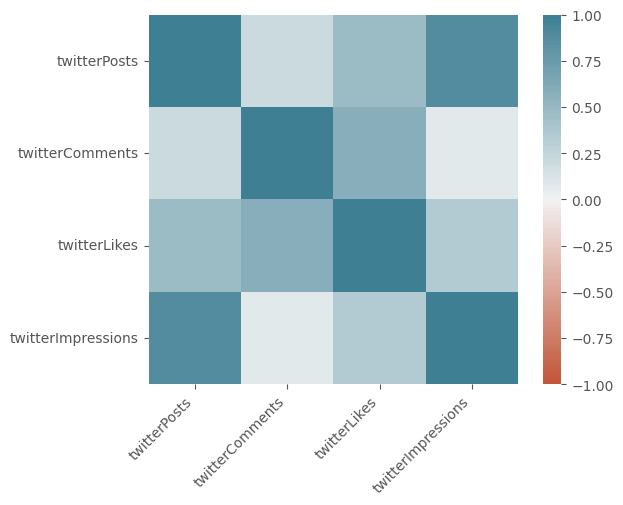

In [ ]:
# draw correlation between inputs with heatmap
import seaborn as sns
data = df[Predictors]

corr = data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
model = build_model_using_sequential()



# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 100, verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 10ms/step - loss: 0.9547
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 0.8805
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.8593
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8400
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8129
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.8131
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7888
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8144
Epoch 9/100
12/12 [==============================] - 0s 11ms/step - loss: 0.8085
Epoch 10/100
12/12 [==============================] - 0s 12ms/step - loss: 0.7910
Epoch 11/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7770
Epoch 12/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7986
Epoch 13/100
12/12 [=========

In [ ]:
# Fitting the ANN to the Training set
#model.fit(X_train, y_train ,batch_size = 5, epochs = 150, verbose=0)
# model.fit(X_train, y_train ,batch_size = 5, epochs = 150, verbose=1)
# model.fit(X_train, y_train ,batch_size = 20, epochs = 150, verbose=1)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['ClosingPrice']=y_test_orig
TestingData['PredictedClose']=Predictions
TestingData.head()

2/2 [==============================] - 0s 11ms/step


,twitterPosts,twitterComments,twitterLikes,twitterImpressions,ClosingPrice,PredictedClose
0,-0.831897,-0.245040,-0.221882,-0.711147,169.840271,157.743408
1,-0.791569,-0.201596,-0.185424,-0.716644,139.136459,159.695236
2,0.537676,-0.206314,-0.195943,0.134586,156.036972,150.402435
3,-0.977154,-0.265167,-0.243509,-0.465928,130.264664,152.427490
4,3.153882,1.651465,1.468596,3.174734,143.235596,135.477417


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(TestingData['ClosingPrice'],TestingData['PredictedClose'])

123.60011758493576

In [ ]:
TestingData['PredictedDailyReturn'] = TestingData['PredictedClose'].pct_change()
TestingData.head()

,twitterPosts,twitterComments,twitterLikes,twitterImpressions,ClosingPrice,PredictedClose,PredictedDailyReturn
0,-0.831897,-0.245040,-0.221882,-0.711147,169.840271,157.743408,NaN
1,-0.791569,-0.201596,-0.185424,-0.716644,139.136459,159.695236,0.012373
2,0.537676,-0.206314,-0.195943,0.134586,156.036972,150.402435,-0.058191
3,-0.977154,-0.265167,-0.243509,-0.465928,130.264664,152.427490,0.013464
4,3.153882,1.651465,1.468596,3.174734,143.235596,135.477417,-0.111201


# VALIDATING
END OF THE MODEL TRAINING, NEXT WE TEST THE MODEL TO THE NEXT YEAR

In [ ]:
aapl_df = df[df['symbol'] == 'AAPL']
aapl_df.rename(columns={'date': 'Date'}, inplace=True)
aapl_df.head(-1)

<ipython-input-43-c6995fedb0da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df.rename(columns={'date': 'Date'}, inplace=True)


,Unnamed: 0,Date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
27,27,2021-11-19,AAPL,2379.0,22985.0,157720.0,13544431.0,NaN
75,75,2021-11-20,AAPL,638.0,6557.0,51217.0,4549378.0,NaN
113,113,2021-11-21,AAPL,463.0,11910.0,85673.0,2611858.0,NaN
153,153,2021-11-22,AAPL,2130.0,9471.0,53753.0,20781957.0,NaN
...,...,...,...,...,...,...,...,...
57835,57835,2023-12-31,AAPL,3133.0,115282.0,822727.0,20597736.0,0.534964
57920,57920,2024-01-01,AAPL,2947.0,109782.0,780961.0,21541547.0,0.514511
58005,58005,2024-01-02,AAPL,2925.0,119739.0,697722.0,24761700.0,0.567959
58090,58090,2024-01-03,AAPL,3109.0,132084.0,727167.0,23056417.0,0.517423


In [ ]:
# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Define the time frame
start_date = '2022-01-04'
end_date = '2023-01-04'

# Get the historical prices for this ticker
aaplstock_df = tickerData.history(period='1d', start=start_date, end=end_date)
aaplstock_df = aaplstock_df.reset_index()
aaplstock_df['Date'] = pd.to_datetime(aaplstock_df['Date']).dt.date
# Display the data
aaplstock_df.head(-1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-04,180.336774,180.642879,176.870839,177.443558,99310400,0.0,0.0
1,2022-01-05,177.354714,177.907680,172.447119,172.723602,94537600,0.0,0.0
2,2022-01-06,170.531463,173.098822,169.484776,169.840256,96904000,0.0,0.0
3,2022-01-07,170.719093,171.953398,168.882448,170.008133,86709100,0.0,0.0
4,2022-01-10,166.956913,170.333968,166.058336,170.027863,106765600,0.0,0.0
...,...,...,...,...,...,...,...,...
245,2022-12-23,130.026375,131.516136,128.755113,130.959961,63814900,0.0,0.0
246,2022-12-27,130.483232,130.513026,127.841385,129.142441,69007800,0.0,0.0
247,2022-12-28,128.784900,130.135617,125.010842,125.179680,85438400,0.0,0.0
248,2022-12-29,127.116366,129.589368,126.858146,128.725311,75703700,0.0,0.0


In [ ]:
# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Define the time frame
start_date = '2022-01-04'
end_date = '2023-01-04'

# Get the historical prices for this ticker
aaplstock_df = tickerData.history(period='1d', start=start_date, end=end_date)
aaplstock_df = aaplstock_df.reset_index()
aaplstock_df['Date'] = pd.to_datetime(aaplstock_df['Date']).dt.date

# Predictions=model.predict(aaplstock_df)

# aaplstock_df['Close']=y_test_orig
# aaplstock_df['PredictedClose']=Predictions
# Display the data
aaplstock_df.head(-1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-04,180.336774,180.642879,176.870839,177.443558,99310400,0.0,0.0
1,2022-01-05,177.354714,177.907680,172.447119,172.723602,94537600,0.0,0.0
2,2022-01-06,170.531463,173.098822,169.484776,169.840256,96904000,0.0,0.0
3,2022-01-07,170.719093,171.953398,168.882448,170.008133,86709100,0.0,0.0
4,2022-01-10,166.956913,170.333968,166.058336,170.027863,106765600,0.0,0.0
...,...,...,...,...,...,...,...,...
245,2022-12-23,130.026375,131.516136,128.755113,130.959961,63814900,0.0,0.0
246,2022-12-27,130.483232,130.513026,127.841385,129.142441,69007800,0.0,0.0
247,2022-12-28,128.784900,130.135617,125.010842,125.179680,85438400,0.0,0.0
248,2022-12-29,127.116366,129.589368,126.858146,128.725311,75703700,0.0,0.0


In [ ]:
aaplstock_df['Date'] = pd.to_datetime(aaplstock_df['Date']).dt.date
aapl_df['Date'] = pd.to_datetime(aapl_df['Date']).dt.date

# Merge the two DataFrames on the 'Date' column
apdf2 = pd.merge(aaplstock_df[['Date', 'Close']], aapl_df[['Date', 'twitterPosts','twitterComments','twitterLikes','twitterImpressions']], on='Date', how='inner')

# Rename the columns if desired
apdf2.rename(columns={'Close': 'ClosingPrice'}, inplace=True)

# Now df_merged is your new DataFrame with only the desired columns
apdf2.head(-1)

<ipython-input-46-0430abd677e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['Date'] = pd.to_datetime(aapl_df['Date']).dt.date


,Date,ClosingPrice,twitterPosts,twitterComments,twitterLikes,twitterImpressions
0,2022-01-04,177.443558,3914.0,145296.0,1125341.0,31390409.0
1,2022-01-05,172.723602,1921.0,37226.0,326572.0,9833076.0
2,2022-01-06,169.840256,1531.0,10846.0,78115.0,10637738.0
3,2022-01-07,170.008133,1612.0,10198.0,49919.0,63219409.0
4,2022-01-10,170.027863,1700.0,14719.0,85099.0,13451060.0
...,...,...,...,...,...,...
245,2022-12-23,130.959961,6033.0,33101.0,265000.0,26669560.0
246,2022-12-27,129.142441,7562.0,32359.0,180136.0,40419377.0
247,2022-12-28,125.179680,10894.0,256234.0,1385410.0,80839717.0
248,2022-12-29,128.725311,7694.0,173573.0,1014063.0,55382389.0


In [ ]:
for x in range(2,6):
   X = apdf2.iloc[:, x].values
   sc_X = StandardScaler()
   #print(X)
   X = sc_X.fit_transform(X.reshape(-1,1))
   apdf2.iloc[:, x]=X
apdf2.head(n=5)

,Date,ClosingPrice,twitterPosts,twitterComments,twitterLikes,twitterImpressions
0,2022-01-04,177.443558,0.043302,0.095599,0.169038,0.021425
1,2022-01-05,172.723602,-0.718219,-0.186845,-0.137456,-0.762355
2,2022-01-06,169.840256,-0.867238,-0.255790,-0.232791,-0.733100
3,2022-01-07,170.008133,-0.836288,-0.257483,-0.243610,1.178662
4,2022-01-10,170.027863,-0.802663,-0.245667,-0.230111,-0.630813


In [ ]:
numerical_feature_columns = ['twitterPosts', 'twitterComments', 'twitterLikes', 'twitterImpressions']

# Select the data for these features
# features_to_scale = apdf[numerical_feature_columns]

# # Assuming PredictorScalerFit is already fitted to the training data
# # Now apply the scaler to your features
# scaled_features = PredictorScalerFit.transform(features_to_scale)

# # Update your DataFrame with the scaled data
# apdf[numerical_feature_columns] = scaled_features

# # Now, when you view the DataFrame, the features should be scaled
# apdf.head()

In [ ]:
new_predictions = model.predict(apdf2[numerical_feature_columns])
apdf2['PredictedClose'] = new_predictions

# Now you can view the DataFrame with the predictions
apdf2.head(-5)

8/8 [==============================] - 0s 2ms/step


,Date,ClosingPrice,twitterPosts,twitterComments,twitterLikes,twitterImpressions,PredictedClose
0,2022-01-04,177.443558,0.043302,0.095599,0.169038,0.021425,0.553273
1,2022-01-05,172.723602,-0.718219,-0.186845,-0.137456,-0.762355,0.669302
2,2022-01-06,169.840256,-0.867238,-0.255790,-0.232791,-0.733100,0.155569
3,2022-01-07,170.008133,-0.836288,-0.257483,-0.243610,1.178662,1.077444
4,2022-01-10,170.027863,-0.802663,-0.245667,-0.230111,-0.630813,0.217524
...,...,...,...,...,...,...,...
241,2022-12-19,131.466446,0.736810,-0.162150,-0.186650,0.381190,-0.355318
242,2022-12-20,131.396957,1.028351,-0.007510,-0.091401,0.459406,-0.673274
243,2022-12-21,134.525452,1.061975,-0.155085,-0.185696,0.107945,-1.134155
244,2022-12-22,131.327423,0.859081,-0.196392,-0.188134,-0.046338,-1.023533


In [ ]:
apdf2['PredictedDailyReturn'] = apdf2['PredictedClose'].pct_change()
apdf2.head()

,Date,ClosingPrice,twitterPosts,twitterComments,twitterLikes,twitterImpressions,PredictedClose,PredictedDailyReturn
0,2022-01-04,177.443558,0.043302,0.095599,0.169038,0.021425,0.553273,NaN
1,2022-01-05,172.723602,-0.718219,-0.186845,-0.137456,-0.762355,0.669302,0.209714
2,2022-01-06,169.840256,-0.867238,-0.255790,-0.232791,-0.733100,0.155569,-0.767565
3,2022-01-07,170.008133,-0.836288,-0.257483,-0.243610,1.178662,1.077444,5.925813
4,2022-01-10,170.027863,-0.802663,-0.245667,-0.230111,-0.630813,0.217524,-0.798111


In [ ]:
apdf2['cumprod'] = (((apdf2['PredictedDailyReturn'] + 100)/100).cumprod() - 3.5)/7
apdf2

,Date,ClosingPrice,twitterPosts,twitterComments,twitterLikes,twitterImpressions,PredictedClose,PredictedDailyReturn,cumprod
0,2022-01-04,177.443558,0.043302,0.095599,0.169038,0.021425,0.553273,NaN,NaN
1,2022-01-05,172.723602,-0.718219,-0.186845,-0.137456,-0.762355,0.669302,0.209714,-0.356843
2,2022-01-06,169.840256,-0.867238,-0.255790,-0.232791,-0.733100,0.155569,-0.767565,-0.357942
3,2022-01-07,170.008133,-0.836288,-0.257483,-0.243610,1.178662,1.077444,5.925813,-0.349524
4,2022-01-10,170.027863,-0.802663,-0.245667,-0.230111,-0.630813,0.217524,-0.798111,-0.350725
...,...,...,...,...,...,...,...,...,...
246,2022-12-27,129.142441,1.437196,-0.199565,-0.193645,0.349700,-1.590918,0.444704,-0.319062
247,2022-12-28,125.179680,2.710346,0.385538,0.268828,1.819301,-1.640963,0.031456,-0.319005
248,2022-12-29,128.725311,1.487632,0.169501,0.126339,0.893724,-0.938084,-0.428333,-0.319780
249,2022-12-30,129.043106,1.118144,-0.031795,-0.057331,0.342597,-1.027423,0.095235,-0.319608


[*********************100%%**********************]  1 of 1 completed


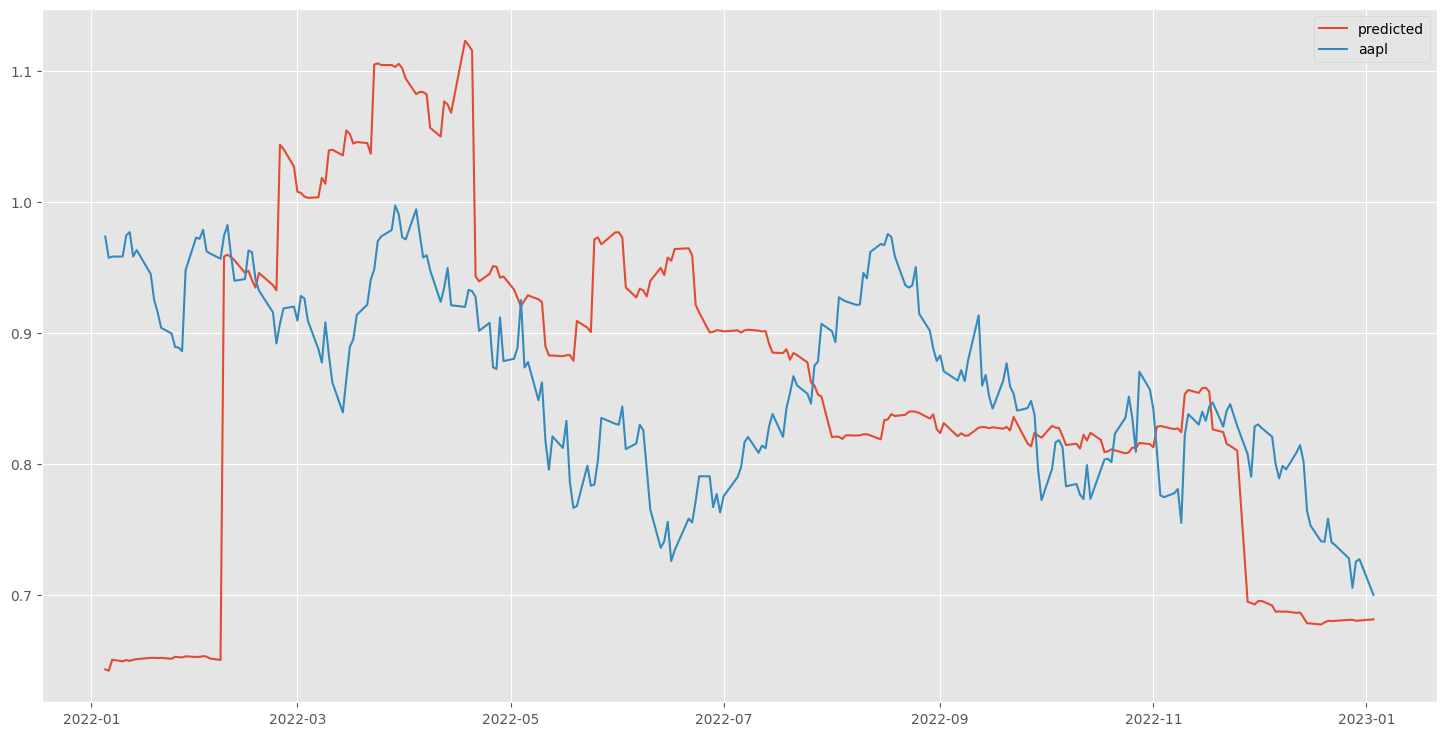

In [ ]:
start = '2022-01-04'
end = '2023-01-04'
AAPL = yf.download(tickers='AAPL', start = start, end = end)
AAPL['return'] = (AAPL['Adj Close'].pct_change()+1).cumprod()
predicted_portfolio = apdf2

fig, ax = plt.subplots()
fig.set_size_inches(18,9)

ax.plot(predicted_portfolio.Date, predicted_portfolio['cumprod'] +1, label = 'predicted')
ax.plot(AAPL.index, AAPL['return'], label = 'aapl')
ax.legend()

In [ ]:
trading_days = 252

# Assuming a 2% annual risk-free rate
annual_risk_free_rate = 0.02
daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/trading_days) - 1

# Annualizing the average daily return
average_daily_return = portfolio['portfolio_return'].mean()
annualized_return = average_daily_return * trading_days

# Annualizing the standard deviation of the portfolio
annualized_std = portfolio['portfolio_return'].std() * (trading_days ** 0.5)

# Calculating the Sharpe Ratio
sharpe_ratio = (annualized_return - annual_risk_free_rate) / annualized_std
sharpe_ratio

NameError: name 'portfolio' is not defined

In [ ]:
max_drawdown = (1 - (portfolio['portfolio_return'] + 1).cumprod().min()) * 100
nasdaq_max_drawdown = (1 - (nasdaq['Adj Close'].pct_change() + 1).cumprod().min()) * 100
spx_max_drawdown = (1 - (spy['Adj Close'].pct_change() + 1).cumprod().min())*100
print(max_drawdown, nasdaq_max_drawdown, spx_max_drawdown)

1.678983950160351 32.290420752172 19.654731305338814


In [ ]:
def calculate_sortino_ratio(df, column_name='portfolio_return', target_return=0.0):
    """
    Calculate the Sortino Ratio for a dataframe of returns.

    Parameters:
    df (pd.DataFrame): Dataframe containing the portfolio returns.
    column_name (str): The name of the column with portfolio returns.
    target_return (float): The target or required rate of return.

    Returns:
    float: The calculated Sortino Ratio.
    """
    # Calculate the excess returns over the target return
    excess_returns = df[column_name] - target_return

    # Calculate the downside returns (only consider the returns that are less than the target return)
    downside_returns = excess_returns.apply(lambda x: x if x < 0 else 0)

    # Calculate the downside deviation (only consider the downside returns)
    downside_deviation = np.sqrt(np.mean(downside_returns**2))

    # Calculate the average excess return (mean of excess returns)
    average_excess_return = excess_returns.mean()

    # Calculate the Sortino Ratio (excess return over the downside deviation)
    sortino_ratio = average_excess_return / downside_deviation if downside_deviation != 0 else np.nan

    return sortino_ratio

calculate_sortino_ratio(portfolio)

0.09511799598527781

In [ ]:
portfolio

,portfolio_return,portfolio
Date,,
2021-12-01,NaN,NaN
2021-12-02,0.025192,1.025192
2021-12-03,-0.007636,1.017363
2021-12-06,0.024215,1.041999
2021-12-07,0.031054,1.074357
...,...,...
2024-02-12,0.008996,1.577133
2024-02-13,-0.013591,1.555699
2024-02-14,0.011370,1.573387
